# Convexity of the ohmic model

(see also handwritten notes)

PH, July 2020

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
import sympy
from sympy import symbols, simplify, sqrt, lambdify

In [173]:
e, y, R, v0 = symbols('e y R v0', positive=True)
p, x = symbols('p x')

## Convexity in the power

Correction factor c(i)

In [174]:
c = 2/(1+sqrt(1+4*p*R/v0**2))
c

2/(sqrt(4*R*p/v0**2 + 1) + 1)

In [16]:
c.subs({R:1, v0:1, p:0}), c.subs({R:1, v0:1, p:-1/4}), c.subs({R:1, v0:1, p:+1/4})

(1, 2, 0.828427124746190)

In [17]:
i = p/v0*c
i

2*p/(v0*(sqrt(4*R*p/v0**2 + 1) + 1))

Normarlized current, with $x = 4p$ (so $x > -1 $)

In [168]:
i_n = i.subs({R:1, v0:1, p:x/4})*2
i_n

x/(sqrt(x + 1) + 1)

Joule losses

In [152]:
pJ = R*i**2
pJ

4*R*p**2/(v0**2*(sqrt(4*R*p/v0**2 + 1) + 1)**2)

normalized Joule losses

In [153]:
pJn = i_n**2
pJn

x**2/(sqrt(x + 1) + 1)**2

First derivative

In [154]:
pJn.diff(x,1)

-x**2/(sqrt(x + 1)*(sqrt(x + 1) + 1)**3) + 2*x/(sqrt(x + 1) + 1)**2

second derivative: difficult to proove it is ≥ 0!

In [155]:
d2pJn = pJn.diff(x,2)
d2pJn

(x**2*(3/((x + 1)*(sqrt(x + 1) + 1)) + (x + 1)**(-3/2))/(2*(sqrt(x + 1) + 1)) - 4*x/(sqrt(x + 1)*(sqrt(x + 1) + 1)) + 2)/(sqrt(x + 1) + 1)**2

Focus on numerator:

In [157]:
denom = (sqrt(x + 1) + 1)**4 * 2 * (x+1)**2 # always >0
simplify(d2pJn*denom )

x**2*sqrt(x + 1) + 4*x**2 + 8*x*sqrt(x + 1) + 12*x + 8*sqrt(x + 1) + 8

Comment : proof of positivity is _yet to be done_, but seems achievable!

### Plots: current, Joule losses, 2nd derivative

Note: the normalized plots here do not use the same normalization as in the sympy expression. In the plots, normalization is such that:

- $p$ is defined as $>-1$ (like $x$ above)
- $i \approx p$ around 0 (while $i\approx p/2$ above)
- $p_J \approx p^2$ around 0 (while $p_J \approx p^2/4$ above)

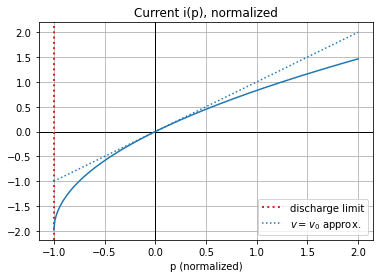

In [166]:
x_vec = np.linspace(-0.9999, 2, 300)
i_vec = x_vec * 2/(1+np.sqrt(1+x_vec))

fig, ax = plt.subplots()
ax.axvline(0, color='k', lw=1)
ax.axhline(0, color='k', lw=1)
ax.axvline(-1, color='tab:red', lw=2, ls=':', label='discharge limit')

ax.plot(x_vec, i_vec)
ax.plot(x_vec, x_vec, 'C0:', label='$v=v_0$ approx.')

ax.legend()
ax.set(
    title = 'Current i(p), normalized',
    xlabel = 'p (normalized)'
)
ax.grid()

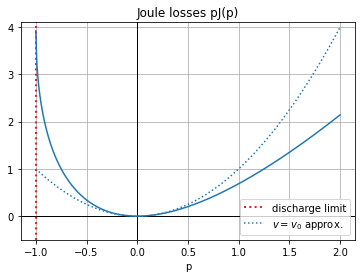

In [169]:
pJ_vec = i_vec**2

fig, ax = plt.subplots()
ax.axvline(0, color='k', lw=1)
ax.axhline(0, color='k', lw=1)
ax.axvline(-1, color='tab:red', lw=2, ls=':', label='discharge limit')

ax.plot(x_vec, pJ_vec)
ax.plot(x_vec, x_vec**2, 'C0:', label='$v=v_0$ approx.')

ax.legend()
ax.set(
    title = 'Joule losses pJ(p)',
    xlabel = 'p',
    ylim = (-0.5, 4.1)
)
ax.grid()

fig.savefig('Joule losses pJ(p).png', dpi=200, bbox_inches='tight')

In [164]:
d2pJ_fun(0)

0.5

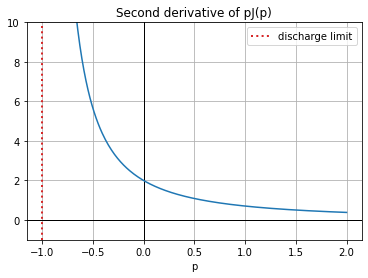

In [165]:
d2pJ_fun = lambdify(x, 4*d2pJn, modules=np)

fig, ax = plt.subplots()
ax.axvline(0, color='k', lw=1)
ax.axhline(0, color='k', lw=1)
ax.axvline(-1, color='tab:red', lw=2, ls=':', label='discharge limit')

ax.plot(x_vec, d2pJ_fun(x_vec))

ax.legend()
ax.set(
    title = 'Second derivative of pJ(p)',
    xlabel = 'p',
    ylim=(-1,10)
)
ax.grid()

## Effect of $v_0$ variation with SoE

Two classical options:

- $v_0 = \sqrt{2E/C}$ (Super caps)
- $v_0 = v_{00} + a.E$ (affine approximation for battery OCV)

TO BE STUDIED... 21/07/20

### Supercaps

In [177]:
pJnSC = pJ.subs({R:1, p:x/4, v0:sqrt(y)})*4
pJnSC

x**2/(y*(sqrt(x/y + 1) + 1)**2)

In [178]:
pJnSC.diff(y,2)

x**2*(x*(3*x/(y*(x/y + 1)*(sqrt(x/y + 1) + 1)) + x/(y*(x/y + 1)**(3/2)) - 4/sqrt(x/y + 1))/(2*y*(sqrt(x/y + 1) + 1)) - 2*x/(y*sqrt(x/y + 1)*(sqrt(x/y + 1) + 1)) + 2)/(y**3*(sqrt(x/y + 1) + 1)**2)